In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('BTC-USD.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1821,2022-07-23,22706.984375,22977.210938,22002.910156,22465.478516,22465.478516,24021799169
1822,2022-07-24,22465.509766,22974.001953,22306.839844,22609.164063,22609.164063,23565495303
1823,2022-07-25,22607.156250,22649.121094,21361.642578,21361.701172,21361.701172,35574561406
1824,2022-07-26,21361.121094,21361.121094,20776.816406,21239.753906,21239.753906,28624673855
1825,2022-07-27,21227.093750,22422.767578,21070.806641,22422.767578,22422.767578,29204635648


In [3]:
data_training = data[data['Date']< '2022-07-20'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-28,2679.729980,2897.449951,2679.729980,2809.010010,2809.010010,1380099968
1,2017-07-29,2807.020020,2808.760010,2692.800049,2726.449951,2726.449951,803745984
2,2017-07-30,2724.389893,2758.530029,2644.850098,2757.179932,2757.179932,705942976
3,2017-07-31,2763.239990,2889.620117,2720.610107,2875.340088,2875.340088,860574976
4,2017-08-01,2871.300049,2921.350098,2685.610107,2718.260010,2718.260010,1324669952
...,...,...,...,...,...,...,...
1813,2022-07-15,20573.156250,21138.244141,20397.000000,20836.328125,20836.328125,25905575359
1814,2022-07-16,20834.103516,21514.404297,20518.898438,21190.316406,21190.316406,24302954056
1815,2022-07-17,21195.041016,21600.640625,20778.179688,20779.343750,20779.343750,22927802083
1816,2022-07-18,20781.912109,22633.033203,20781.912109,22485.689453,22485.689453,39974475562


In [4]:
data_test = data[data['Date']> '2022-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
1619,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
1620,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
1621,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
1622,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
1623,2022-01-06,43565.511719,43748.718750,42645.539063,43160.929688,43160.929688,30208048289
...,...,...,...,...,...,...,...
1821,2022-07-23,22706.984375,22977.210938,22002.910156,22465.478516,22465.478516,24021799169
1822,2022-07-24,22465.509766,22974.001953,22306.839844,22609.164063,22609.164063,23565495303
1823,2022-07-25,22607.156250,22649.121094,21361.642578,21361.701172,21361.701172,35574561406
1824,2022-07-26,21361.121094,21361.121094,20776.816406,21239.753906,21239.753906,28624673855


In [5]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,2679.729980,2897.449951,2679.729980,2809.010010,1380099968
1,2807.020020,2808.760010,2692.800049,2726.449951,803745984
2,2724.389893,2758.530029,2644.850098,2757.179932,705942976
3,2763.239990,2889.620117,2720.610107,2875.340088,860574976
4,2871.300049,2921.350098,2685.610107,2718.260010,1324669952


In [6]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.00000000e+00, 2.10385610e-03, 5.47245176e-04, 1.51627988e-03,
        1.92472205e-03],
       [1.96223264e-03, 7.60701924e-04, 7.52306999e-04, 2.43308106e-04,
        2.79228145e-04],
       [6.88452443e-04, 0.00000000e+00, 0.00000000e+00, 7.17125579e-04,
        0.00000000e+00],
       ...,
       [2.85421763e-01, 2.85352085e-01, 2.84501454e-01, 2.78596117e-01,
        6.34435343e-02],
       [2.79053197e-01, 3.00987030e-01, 2.84560013e-01, 3.04905811e-01,
        1.12111884e-01],
       [3.05042674e-01, 3.16645254e-01, 2.98703935e-01, 3.18840404e-01,
        1.37209460e-01]])

In [7]:
X_train = []
Y_train = []

In [8]:
training_data.shape[0]

1818

In [9]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])

In [10]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [11]:
X_train.shape

(1758, 60, 5)

# Building LSTM

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [13]:
regressor = Sequential()
regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

2022-07-28 07:39:45.264580: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-28 07:39:45.266022: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [14]:
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units =1))

In [15]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [16]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [17]:
regressor.fit(X_train, Y_train, epochs = 20, batch_size =50)

Train on 1758 samples
Epoch 1/20
1758/1758 [==============================] - 29s 16ms/sample - loss: 0.0399
Epoch 2/20
1758/1758 [==============================] - 24s 14ms/sample - loss: 0.0094
Epoch 3/20
1758/1758 [==============================] - 23s 13ms/sample - loss: 0.0070
Epoch 4/20
1758/1758 [==============================] - 23s 13ms/sample - loss: 0.0067
Epoch 5/20
1758/1758 [==============================] - 24s 14ms/sample - loss: 0.0062
Epoch 6/20
1758/1758 [==============================] - 41s 24ms/sample - loss: 0.0060
Epoch 7/20
1758/1758 [==============================] - 49s 28ms/sample - loss: 0.0055
Epoch 8/20
1758/1758 [==============================] - 42s 24ms/sample - loss: 0.0061
Epoch 9/20
1758/1758 [==============================] - 43s 24ms/sample - loss: 0.0055
Epoch 10/20
1758/1758 [==============================] - 48s 28ms/sample - loss: 0.0059
Epoch 11/20
1758/1758 [==============================] - 42s 24ms/sample - loss: 0.0051
Epoch 12/20
1758/17

 # Test

In [18]:
past_60_days = data_training.tail(60)
df= past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,29199.859375,29588.869141,29027.394531,29432.226563,17274840442
1,29432.472656,30425.861328,29275.183594,30323.722656,21631532270
2,30309.396484,30590.585938,28975.560547,29098.910156,31483454557
3,29101.125000,29774.355469,28786.589844,29655.585938,26616506245
4,29653.134766,30157.785156,29384.949219,29562.361328,27525063551


In [19]:
inputs = scaler.transform(df)
inputs

array([[0.4088196 , 0.40632885, 0.41392686, 0.41201264, 0.0473043 ],
       [0.41240544, 0.41900458, 0.41781453, 0.42575838, 0.05974268],
       [0.42592361, 0.42149923, 0.41311362, 0.40687332, 0.08786997],
       ...,
       [0.30719015, 0.30123067, 0.29365565, 0.28757533, 0.0995501 ],
       [0.28798196, 0.28172471, 0.28448006, 0.28569506, 0.07970814],
       [0.28591587, 0.29780269, 0.2890926 , 0.30393564, 0.08136393]])

In [20]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [21]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((207, 60, 5), (207,))

In [22]:
Y_pred = regressor.predict(X_test)
Y_pred, Y_test

(array([[0.27806866],
        [0.28418335],
        [0.2989306 ],
        [0.32342535],
        [0.3568594 ],
        [0.3967985 ],
        [0.43981832],
        [0.48216188],
        [0.5207789 ],
        [0.5533924 ],
        [0.57910144],
        [0.5982179 ],
        [0.611431  ],
        [0.61953795],
        [0.62347984],
        [0.6242247 ],
        [0.6225094 ],
        [0.6189536 ],
        [0.61409   ],
        [0.60839146],
        [0.60128933],
        [0.5918538 ],
        [0.580028  ],
        [0.5661582 ],
        [0.5513586 ],
        [0.5370238 ],
        [0.5242105 ],
        [0.5138806 ],
        [0.50684965],
        [0.5032814 ],
        [0.5029385 ],
        [0.50546086],
        [0.50994915],
        [0.51522934],
        [0.521098  ],
        [0.5278995 ],
        [0.5359221 ],
        [0.54538196],
        [0.5563059 ],
        [0.56829244],
        [0.5806684 ],
        [0.5922277 ],
        [0.6018099 ],
        [0.6086657 ],
        [0.61249876],
        [0

In [23]:
scaler.scale_

array([1.54154452e-05, 1.51443801e-05, 1.56894216e-05, 1.54187363e-05,
       2.85500569e-12])

In [24]:
scale = 1/5.18164146e-05
scale

19298.903787912797

In [25]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [26]:
Y_pred


array([[ 5366.4204],
       [ 5484.4272],
       [ 5769.0327],
       [ 6241.755 ],
       [ 6886.995 ],
       [ 7657.776 ],
       [ 8488.012 ],
       [ 9305.196 ],
       [10050.462 ],
       [10679.867 ],
       [11176.023 ],
       [11544.95  ],
       [11799.948 ],
       [11956.403 ],
       [12032.478 ],
       [12046.854 ],
       [12013.75  ],
       [11945.126 ],
       [11851.265 ],
       [11741.289 ],
       [11604.226 ],
       [11422.13  ],
       [11193.905 ],
       [10926.232 ],
       [10640.616 ],
       [10363.971 ],
       [10116.688 ],
       [ 9917.333 ],
       [ 9781.643 ],
       [ 9712.78  ],
       [ 9706.162 ],
       [ 9754.841 ],
       [ 9841.46  ],
       [ 9943.361 ],
       [10056.621 ],
       [10187.882 ],
       [10342.71  ],
       [10525.274 ],
       [10736.094 ],
       [10967.422 ],
       [11206.264 ],
       [11429.346 ],
       [11614.272 ],
       [11746.581 ],
       [11820.555 ],
       [11848.149 ],
       [11845.972 ],
       [11816

In [27]:
Y_test

array([13387.90949999, 13287.53771046, 13024.3409605 , 12857.89136632,
       12163.56890112, 12041.01584081, 11567.36256218, 11618.90813053,
       11671.12075219, 11644.13065367, 11918.62663851, 12276.98542099,
       11875.99216063, 12025.64339629, 12046.510316  , 12030.46965582,
       11772.22467372, 11809.10436287, 11621.67512399, 11310.95836872,
       10053.11867036,  9629.40840474,  9994.85143441, 10107.62530528,
       10195.59966224, 10163.28010858, 10248.53395694, 10442.58492148,
       10553.01829453, 10484.10609396, 10651.14836616, 10729.07857168,
       10193.90065166, 10254.72802462, 11549.51713898, 11531.56015282,
       11818.84520261, 12249.58858241, 12321.59897886, 12396.30083143,
       12165.24002096, 11820.48726968, 11768.20608322, 11744.65351818,
       11872.30128644, 12464.8678842 , 12274.10802662, 11267.08507742,
       11110.56690998, 11137.96026214, 10633.72827684, 10230.78034051,
       10592.69402991, 10293.19516141, 10607.11237889, 10868.71587042,
      

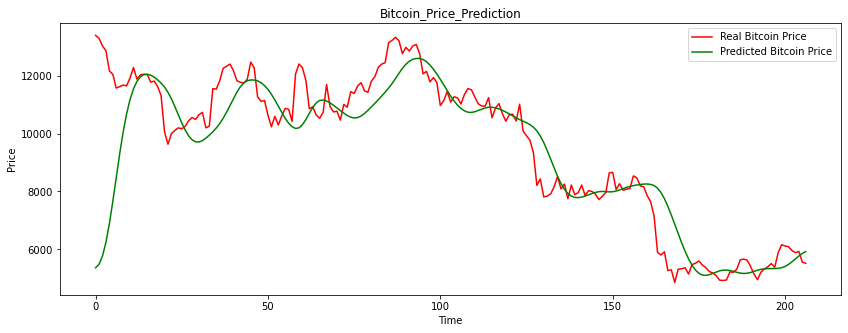

In [29]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin_Price_Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()